<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

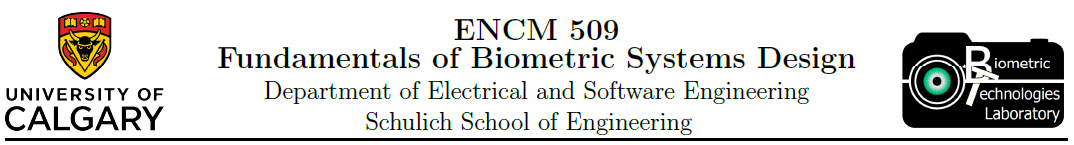

## Lab 2:

* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    
    

### Introduction

The purpose of this lab was to familiarize ourselves with biometric data collection in the form of signature acquisition, as well as to perform statistical analysis to visualize the data and better understand the difference in distributions of different variables. Additionally, another objective of the lab was to gain more insight into the differences between the genuine and imposter samples prior to matching.

At the start of this lab we used Wacom tablets to take signatures that were later used for analysis. We took 30 genuine signatures, 30 imposter signatures and 30 random words that look similar to the genuine signature. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Exercise 1:

In [3]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 1000 #sample size increased from 80

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([53.48960444, 51.01081238, 44.04833694, 54.75489756, 55.95849472,
       44.49464316, 51.8645901 , 43.39346457, 53.82239571, 54.20118534,
       39.94295895, 54.89712117, 47.07199867, 65.84125588, 43.01282301,
       47.44665448, 52.94486129, 50.41490241, 55.66974183, 39.37857194,
       53.0348187 , 49.09079828, 55.74149255, 54.4884812 , 52.65143609,
       56.42579376, 46.80806987, 49.47614503, 46.55615897, 46.31189752,
       55.61753195, 47.39109196, 50.48307315, 48.62104351, 50.40742568,
       53.82643456, 51.61370109, 48.01249577, 55.86069024, 45.60525845,
       47.77695592, 54.64092984, 55.34096938, 56.33046255, 49.86124976,
       45.73238855, 55.17803152, 55.78457089, 52.37291086, 49.58326026,
       46.32526433, 52.87511849, 47.5489722 , 53.9337771 , 50.32129525,
       48.11188668, 48.10533841, 51.52134043, 47.56687532, 49.67504621,
       58.10164285, 49.70139052, 53.40502223, 44.60190067, 46.74785801,
       49.08557914, 51.22240937, 53.09218022, 43.71777002, 45.72

REAL mean: 49.99; std: 5.12


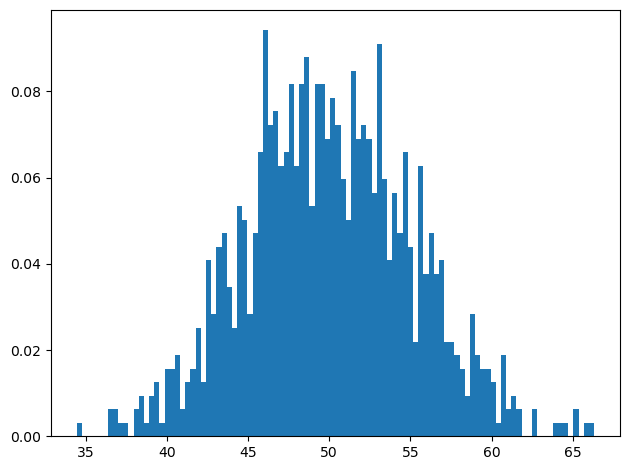

In [4]:
plt.hist(pop_norm, bins= 100, density=True) #bin size increased from 10
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

For this exercise, we plot the histogram of a sample of data with a theoretical mean of 50 and a standard deviation of 5. We increase the sample size from 80 to 1000, and the number of bins from 10 to 100. When comparing the resulting histogram with these changes to the previous one, the main difference is the smoother shape of the distribution, which more closely resembles the normal distribution. As samples are reflections of the population, a larger sample size will produce histograms closer in resemblance to the population distribution. Increasing the number of bins allows us to see more details in the distribution, such as variance around the mean. 

### Exercise 2:

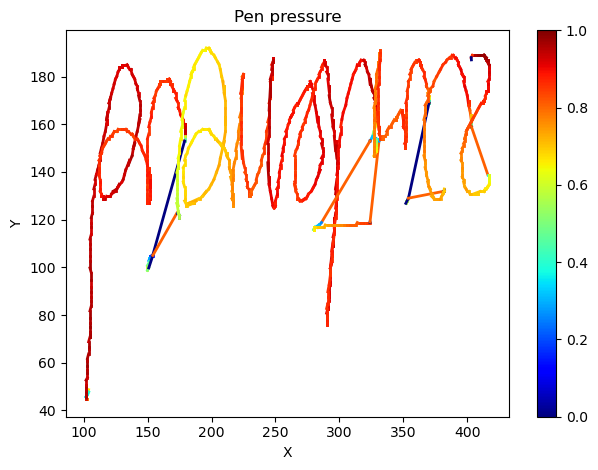

In [5]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

csv_file.head()

# splitting the original data/ matrix into 3 variables
coord1 = csv_file[[ 'X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

prs1_arr = prs1
prs1 = prs1 / np.max(prs1) * 255 #normalization
prs1 = prs1.astype(int)
pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot( coord1[i:i+2 ,0] , coord1[i:i+2 ,1], linewidth =2, c=c)
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin =0, vmax =1))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')
plt.colorbar(sm)

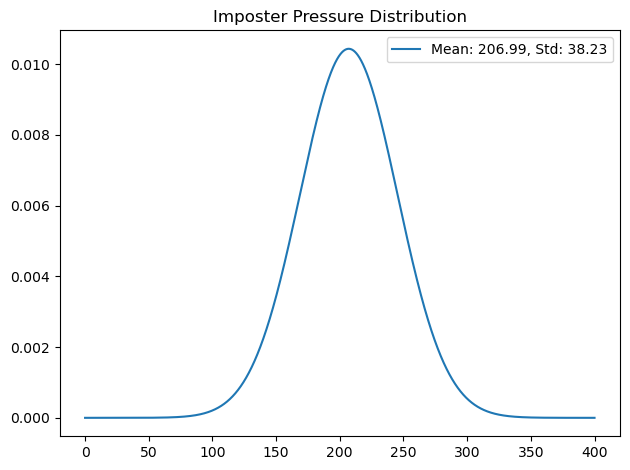

In [6]:
mean = np.mean(prs1)
std = np.std(prs1)

arr = np.arange(0,400,0.01)

plt.plot(arr, norm.pdf(arr,mean,std))
plt.title("Imposter Pressure Distribution")
plt.legend(['Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean, std=std)])
plt.show()

After plotting the pressure map of a sample imposter signature, we calculate the mean and standard deviation of pressure measurements and plot the normal distribution. We see that the mean pressure value is 206.99 and the standard deviation is 38.23.

### Exercise 3:

The line `if time_diff == 0` is needed to avoid division by zero when calculating velocity.

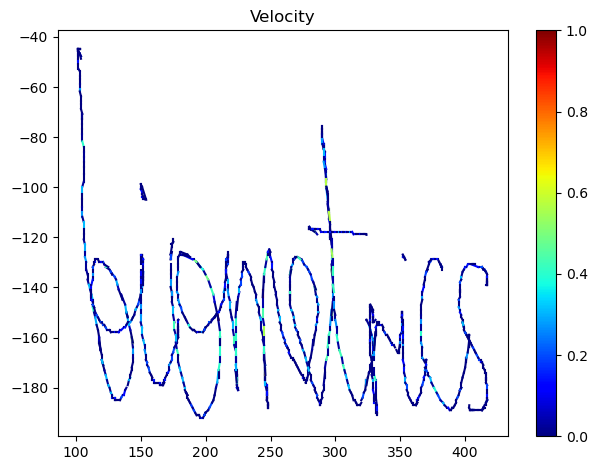

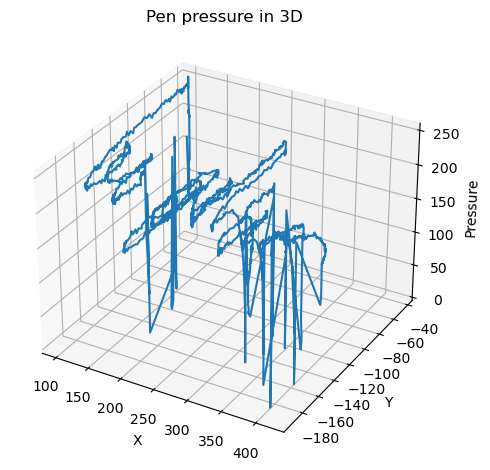

In [7]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
plt.show()

#Function to calculate velocity 
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

To observe changes in velocity as a signature is written, we plot the velocity map of a sample imposter signature, as well as a 3d map where the third coordinate is pressure.

### Exercise 4:

We analyze the pressure and velocity measurements of the 30 genuine signatures we collected by determining the distributions of pressue and velocity across average values. 

To plot the average pressue distribution, we first calculate the average pressue of each signature, and then calculate the average of these 30 values. This average is used in the pressure distribution plot, along with the standard deviation of the 30 average pressue values. 

We follow the same process for velocity, where we first calculate the average velocities for each signature, and then calculate the average of these values to use in the normal distribution plot. The standard deviation was calculated using the 30 average velocity values.

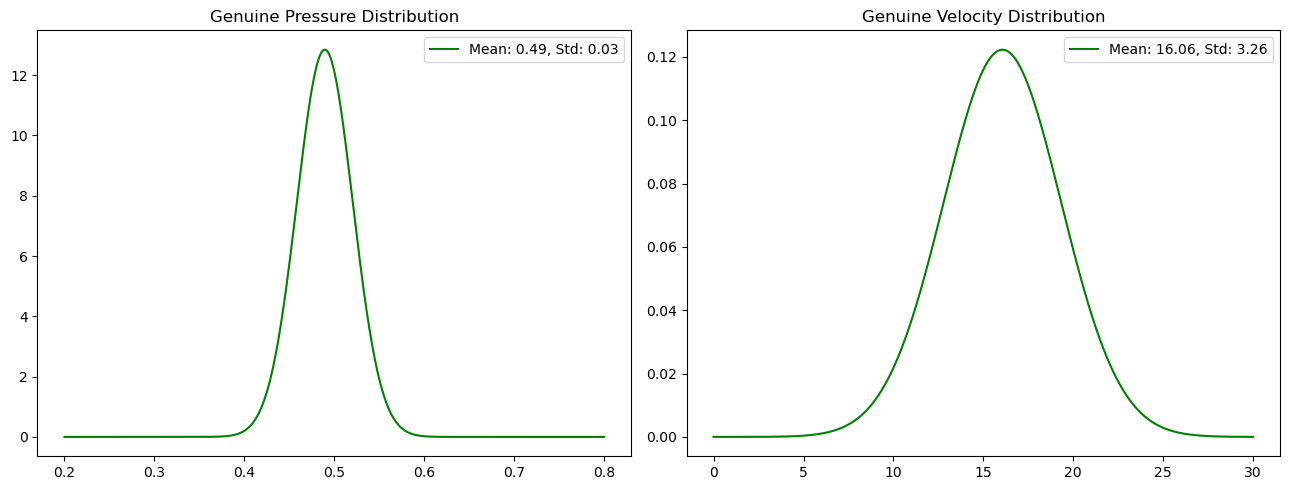

In [12]:
#loading our signatures

data_dir = 'sig_vals/'

#arrays to store the average pressue and velocity values of each signature
prs_arr = []
vel_arr = []

for i in range(1,31):
    file = f'g{i}.csv' #open genuine signatures
    csv_file = pd.read_csv(data_dir + file)
    
    coord1 = csv_file[[ 'X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    prs_arr.append(np.mean(prs1)) #stores the average of the pressure values

    #first calculates velocity of each time and coordinate value, then stores the average
    vel = calc_velocity(time1,coord1) 
    vel_arr.append(np.mean(vel))

mean_prs_g = np.mean(prs_arr) #average value of the 30 average pressure values 
std_prs_g = np.std(prs_arr) #standard deviation of the 30 average pressue values

mean_vel_g = np.mean(vel_arr) #average value of the 30 average velocity values 
std_vel_g = np.std(vel_arr) #standard deviation of the 30 average velocity values

prs_range_g = np.arange(0.2,0.8,0.001)
vel_range_g = np.arange(0,30,0.01)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(prs_range_g, norm.pdf(prs_range_g,mean_prs_g,std_prs_g), 'g')
plt.legend(['Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_prs_g, std=std_prs_g)])
plt.title('Genuine Pressure Distribution')

plt.subplot(1,2,2)
plt.plot(vel_range_g, norm.pdf(vel_range_g,mean_vel_g,std_vel_g), 'g')
plt.legend(['Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_vel_g, std=std_vel_g)])
plt.title('Genuine Velocity Distribution')

plt.show()

From the distributions, we see that the average pressures of the genuine signatures had a mean of 0.49 with a small standard deviation of 0.03, while the average velocities had a mean of 16.06 and a standard deviation of 3.26.

### Exercise 5:

To analyze the pressue and velocity measurements of the 30 imposter signatures, we follow the exact same process as exercise 4 with the imposter signature measurement files. 

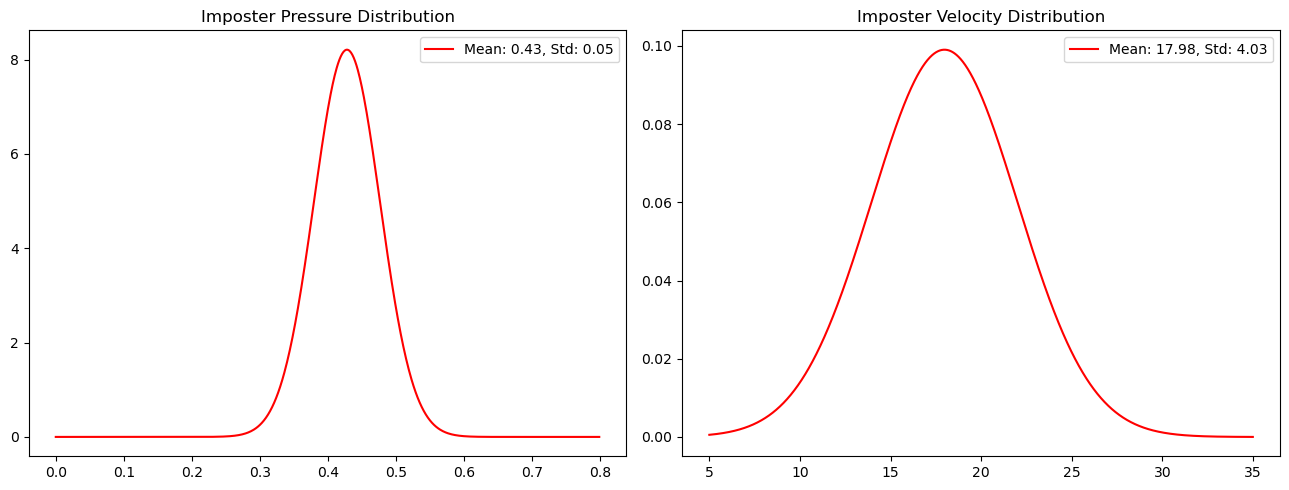

In [11]:
#loading our signatures

data_dir = 'sig_vals/'

prs_arr = []
vel_arr = []
for i in range(1,31):
    file = f'i{i}.csv' #open imposter signatures
    csv_file = pd.read_csv(data_dir + file)
    
    coord1 = csv_file[[ 'X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    prs1_arr = prs1
    
    prs_arr.append(np.mean(prs1))
    vel = calc_velocity(time1,coord1)    
    vel_arr.append(np.mean(vel))
    
mean_prs_i = np.mean(prs_arr)
std_prs_i = np.std(prs_arr)

mean_vel_i = np.mean(vel_arr)
std_vel_i = np.std(vel_arr)

prs_range_i = np.arange(0,0.8,0.001)
vel_range_i = np.arange(5,35,0.01)


plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(prs_range_i, norm.pdf(prs_range_i,mean_prs_i,std_prs_i), 'r')
plt.legend(['Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_prs_i, std=std_prs_i)])
plt.title('Imposter Pressure Distribution')

plt.subplot(1,2,2)
plt.plot(vel_range_i, norm.pdf(vel_range_i,mean_vel_i,std_vel_i), 'r')
plt.legend(['Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_vel_i, std=std_vel_i)])
plt.title('Imposter Velocity Distribution')

plt.show()

The distributions show that the average pressures of the imposter signatures had a mean of 0.43 with a standard deviation of 0.05, while the average velocities had a mean of 17.98 and a standard deviation of 4.03.

### Comparision of the genuine and imposter distributions:

Comparing the genuine and imposter distributions, we see that for pressure, the genuine signatures had less deviation, indicating that each signature was written with a relatively similar amount of pressure. However, the spread in the imposter distribution is larger, indicating that an inconsistent amount of pressue was used with each signature. Additionally, the difficulty to replicate the pressue being used when writing a signature is shown in the difference in mean average pressue values. 

The main difference between the velocity distribution for the genuine and imposter samples is the deviation, with the genuine samples having less spread indicating that signatures were mostly written at the same speed. The velocity of the imposter signatures appears to be less consistent among samples. However, the mean values are relatively close with the imposter having a higher average velocity when writing signatures compared to the individual that is genuine. As the two distributions are relatively close in distance, there will likely be a high number of false matches and false non-matches.

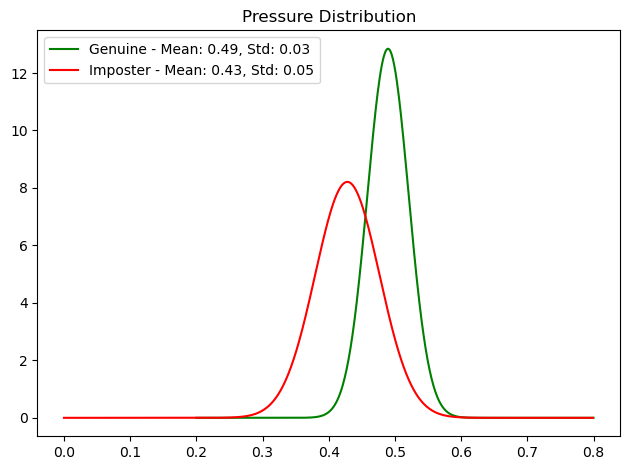

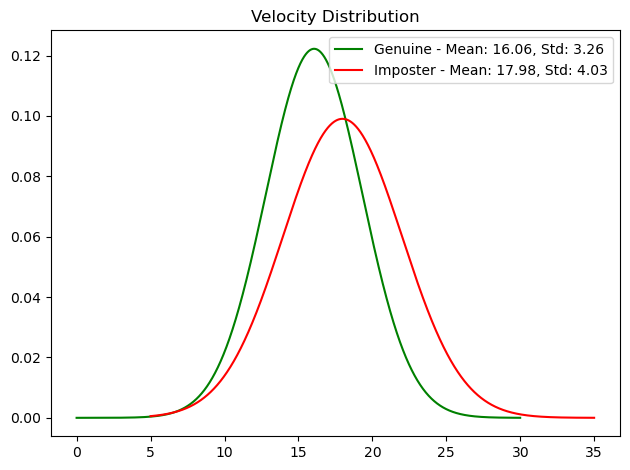

In [10]:
plt.plot(prs_range_g, norm.pdf(prs_range_g,mean_prs_g,std_prs_g),'g')
plt.plot(prs_range_i, norm.pdf(prs_range_i,mean_prs_i,std_prs_i),'r')
plt.title('Pressure Distribution')
plt.legend(['Genuine - Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_prs_g, std=std_prs_g), 
'Imposter - Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_prs_i, std=std_prs_i)])
plt.show()

plt.plot(vel_range_g, norm.pdf(vel_range_g,mean_vel_g,std_vel_g),'g')
plt.plot(vel_range_i, norm.pdf(vel_range_i,mean_vel_i,std_vel_i),'r')
plt.title('Velocity Distribution')
plt.legend(['Genuine - Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_vel_g, std=std_vel_g), 
'Imposter - Mean: {mean:.2f}, Std: {std:.2f}'.format(mean=mean_vel_i, std=std_vel_i)])

plt.show()


### Conclusion

In this lab, we first observed that increasing the sample size and the number of bins when plotting a histogram results in a distribution that more closely resembles the normal distribution. We then became familiar with data visualization and color maps, as well as plotting the distribution of pressue values for a single sample signature. We then did further analysis of the data to plot a velocity map, and became familiar with visualizing data in both 2d and 3d spaces. Finally, we gained more insight into the 30 genuine and imposter signatures we collected. Overall we found that the two distributions are fairly similar, especially for average velocity values, which will likely result in a large number of false matches and false non-matches in future analysis.